### **4.2** Comparing a Convolutional NN with Different Activation functions:


In [ ]:
def createCNN(input_shape, activation):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape = input_shape))
  model.add(Activation(activation))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [ ]:
def trainNet(model, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model):

# train without data augmentation
  if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
# train with data augmentation
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model])
  return history


In [ ]:
def loadData():
  # Load the data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # print('x_train shape:', x_train.shape)
  # print(x_train.shape[0], 'train samples')
  # print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  feature_vector_length = 32*32*3
  x_train_flat = x_train.reshape(x_train.shape[0], feature_vector_length)
  x_test_flat = x_test.reshape(x_test.shape[0], feature_vector_length)

  x_validate = x_train[40000:,:]
  x_train = x_train[:40000,:]
  y_validate = y_train[40000:,:]
  y_train = y_train[:40000,:]

  x_validate_flat = x_train_flat[40000:,:]
  x_train_flat = x_train_flat[:40000,:]
  
  return x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat 

Not using data augmentation.
Epoch 1/20
1244/1250 [============================>.] - ETA: 0s - loss: 1.8658 - accuracy: 0.3205
Epoch 00001: val_accuracy improved from -inf to 0.44650, saving model to best_model_CNN_relu.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8641 - accuracy: 0.3211 - val_loss: 1.5623 - val_accuracy: 0.4465
Epoch 2/20
1243/1250 [============================>.] - ETA: 0s - loss: 1.5100 - accuracy: 0.4524
Epoch 00002: val_accuracy improved from 0.44650 to 0.49320, saving model to best_model_CNN_relu.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5094 - accuracy: 0.4527 - val_loss: 1.4196 - val_accuracy: 0.4932
Epoch 3/20
1248/1250 [============================>.] - ETA: 0s - loss: 1.3566 - accuracy: 0.5127
Epoch 00003: val_accuracy improved from 0.49320 to 0.56090, saving model to best_model_CNN_relu.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3565 - accuracy: 0.5128 - val_loss: 1.2418 - val_a

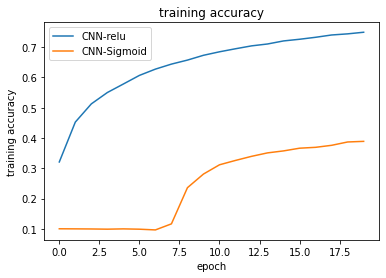

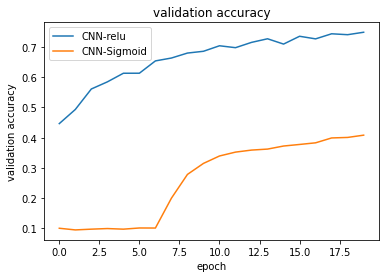

313/313 [==============================] - 1s 3ms/step - loss: 0.7506 - accuracy: 0.7456
Test accuracy for CNN with relu activation: 0.7455999851226807
313/313 [==============================] - 1s 3ms/step - loss: 1.6224 - accuracy: 0.4214
Test accuracy for CNN with sigmoid activation: 0.4214000105857849


In [ ]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat = loadData()

# Define a convolutional neural network
model_CNN_relu = createCNN(input_shape=x_train.shape[1:], activation = 'relu')
model_CNN_sigmoid = createCNN(input_shape=x_train.shape[1:],activation ='sigmoid')
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
# Compile the model before using it
model_CNN_relu.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_CNN_sigmoid.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# print(model.summary())

# create a callback that will save the best model while training
save_best_model_CNN_relu = ModelCheckpoint('best_model_CNN_relu.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_CNN_sigmoid = ModelCheckpoint('best_model_CNN_sigmoid.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# train model
history_CNN_relu = trainNet(model_CNN_relu, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model_CNN_relu)
history_CNN_sigmoid = trainNet(model_CNN_sigmoid, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model_CNN_sigmoid)

# Plot training accuracy
plt.plot(history_CNN_relu.history['accuracy'])
plt.plot(history_CNN_sigmoid.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['CNN-relu','CNN-Sigmoid'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history_CNN_relu.history['val_accuracy'])
plt.plot(history_CNN_sigmoid.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['CNN-relu','CNN-Sigmoid'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_CNN_relu = load_model('best_model_CNN_relu.h5')
scores = saved_model_CNN_relu.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for CNN with relu activation:', scores[1])

saved_model_CNN_sigmoid = load_model('best_model_CNN_sigmoid.h5')
scores = saved_model_CNN_sigmoid.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for CNN with sigmoid activation:', scores[1])



Relu activation function seems to perfrom better in this assignment. Relu activation has been the state of the art activation function for some years for several reasons. 


1.   **Gradient Vanishing:** The problem of gradient vanishing in sigmoid function for backpropagation has always been an issue since the derivative of the sigmoid function is always smaller than one. In fact it is at most 0.25. While this is not the case for Relu function.
2.   **computationally efficient**: To compute functions like Relu we just need to pick max(0, x) and not perform expensive exponential operations as in Sigmoids.
3. **Faster Learning**: With Relu definition as h=max(0,a) where a=Wx+b. The gradient has a constant value when a>0. This would result in a faster and more efficient learning in Relu than Sigmoid.

